# Modelo ML Supervisado detector Anomalias en intraestructura en la nube

# I. Descripción del problema e inspección del conjunto de datos

## 1. Descripción del problema y conjuto de datos

El objetivo es identificar automáticamente, basándose en un conjunto de métricas operacionales (como el uso de CPU, memoria, tráfico de red, y consumo de energía), cuándo una VM se está comportando de manera anómala o inusual, en lugar de su patrón de comportamiento normal.

**Finalidad**: Este tipo de detección es crucial para la monitorización del rendimiento, el mantenimiento predictivo, y la fiabilidad general de los servicios en la nube, permitiendo identificar fallos de hardware, software o posibles incidentes de seguridad de forma temprana.

**Aproximación**: El dataset proporciona una etiqueta binaria ("Anomaly status") para cada conjunto de métricas, lo que permite el desarrollo y la evaluación de modelos de Machine Learning supervisado para clasificar si un estado de la VM es normal o anómalo

El conjunto de datos proviene de un dataset de Kanggle https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data

### Descripción de Variables

| Variable | Tipo de Dato (Implícito) | Descripción Mejorada |
| :--- | :--- | :--- |
| **vm\_id** | Categórico / ID | **Identificador único** de la Máquina Virtual (VM) en el entorno de la nube. Permite rastrear el rendimiento individual de cada instancia. |
| **timestamp** | Temporal | **Marca de tiempo** exacta de la medición. Es fundamental para el análisis de **series de tiempo** y la detección de patrones temporales o estacionalidad. |
| **cpu\_usage** | Numérico (Porcentaje) | **Utilización del Procesador Central (CPU)**, expresada como un porcentaje (0-100%). Mide la carga de trabajo de la VM. |
| **memory\_usage** | Numérico (Porcentaje) | **Utilización de la Memoria RAM**, expresada como un porcentaje (0-100%). Indica la cantidad de memoria activa consumida por los procesos. |
| **network\_traffic** | Numérico | **Volumen de Tráfico de Red** (entrada/salida) de la VM. Medido en una escala relativa (0-1000); podría representar bytes/segundo o paquetes/segundo. |
| **power\_consumption** | Numérico | **Consumo de Energía** de la VM en la unidad de tiempo. Medido en una escala relativa (0-500); la unidad física podría ser Vatios (W). |
| **num\_executed\_instructions** | Numérico (Contador) | **Número de Instrucciones** ejecutadas por la CPU durante el intervalo de medición. Mide la productividad computacional. |
| **execution\_time** | Numérico | **Tiempo de Ejecución** de las tareas o procesos en la VM. Medido en una escala relativa (0-100); podría representar milisegundos o un tiempo de respuesta normalizado. |
| **energy\_efficiency** | Numérico (Ratio) | **Eficiencia Energética**. Un valor normalizado entre 0 y 1, que generalmente se calcula como una razón entre el rendimiento (ej. instrucciones ejecutadas) y el consumo de energía. |
| **task\_type** | Categórico | **Tipo de Tarea** principal que se está ejecutando en la VM en ese momento. Categorías clave: **'io'** (Intensiva en Entrada/Salida), **'network'** (Intensiva en Red), **'other'**. |
| **task\_priority** | Categórico Ordinal | **Nivel de Prioridad** asignado a la tarea en curso. Categorías: **'low'** (Baja), **'high'** (Alta), **'other'** (Otras o media/variable). |
| **task\_status** | Categórico | **Estado Actual de la Tarea** medida. Categorías: **'waiting'** (En espera de recursos), **'running'** (Actualmente en ejecución), **'other'** (Otros estados, como completada o fallida). |
| **Anomaly status** | Binario (Target) | **Estado de Anomalía**. Esta es la **variable objetivo** (`target`). Un valor de **1** indica que el comportamiento de la VM se considera **Anómalo**, y **0** indica un comportamiento **Normal**. |

### Contenido Dataset

### Import Libraries

In [ ]:
# Install libraries
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


/home/camilosar/Escritorio/IA/model_construction_project/env/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import Dataset

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Cloud_Anomaly_Dataset.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sandhyapeesara/cloud-anomaly-data",
  file_path,
)

df.info()

100%|██████████| 37.4M/37.4M [00:01<00:00, 21.2MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             277570 non-null  int64  
dtypes: float64(7), int64(1), obje

### Identificación de datos unicos

In [4]:
df.nunique()

vm_id                        249595
timestamp                     44552
cpu_usage                    250128
memory_usage                 249774
network_traffic              249724
power_consumption            250010
num_executed_instructions     10000
execution_time               249957
energy_efficiency            249591
task_type                         3
task_priority                     3
task_status                       3
Anomaly status                    2
dtype: int64

Preliminarmente no se puede descartar ningura variable por ser constate

## 2. Analisis exploratorio de Datos (EDA)


### Histogramas y diagramas de cajas para valores numericos

In [6]:
# Variables numéricas para análisis
numerical_vars = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions',
'execution_time', 'energy_efficiency']


#### Histogramas

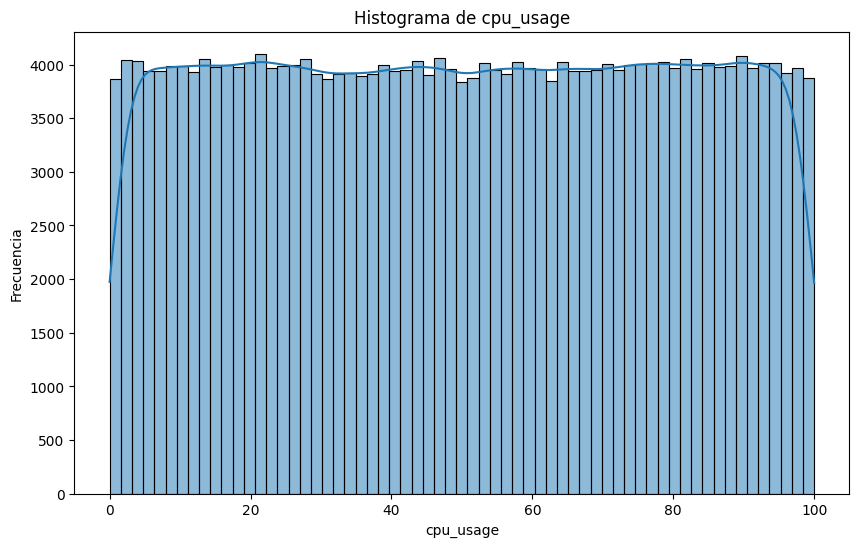

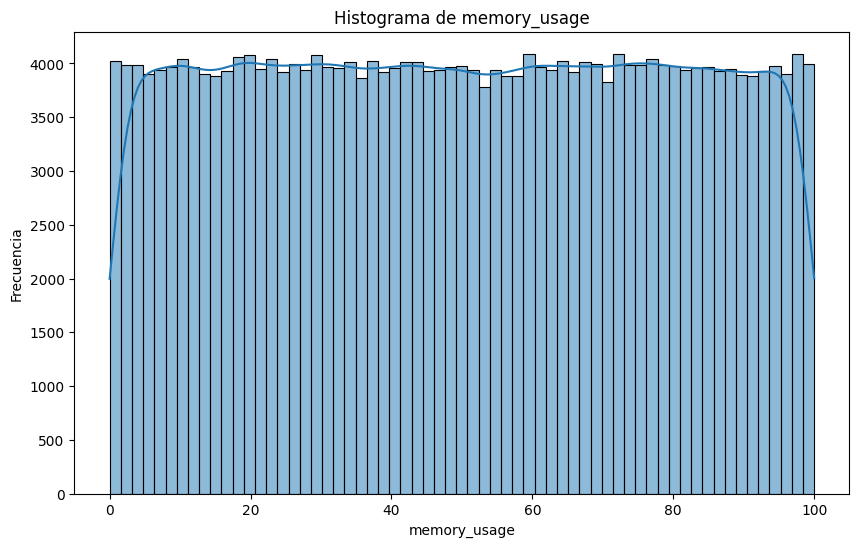

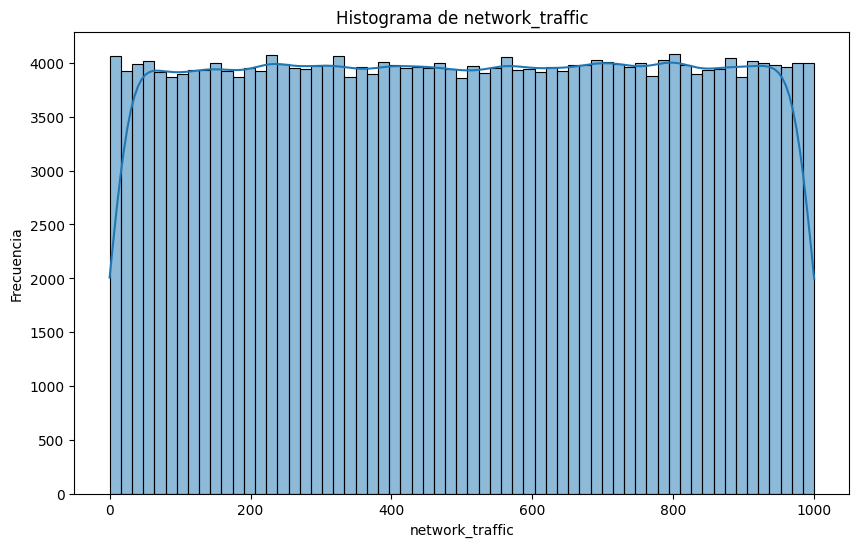

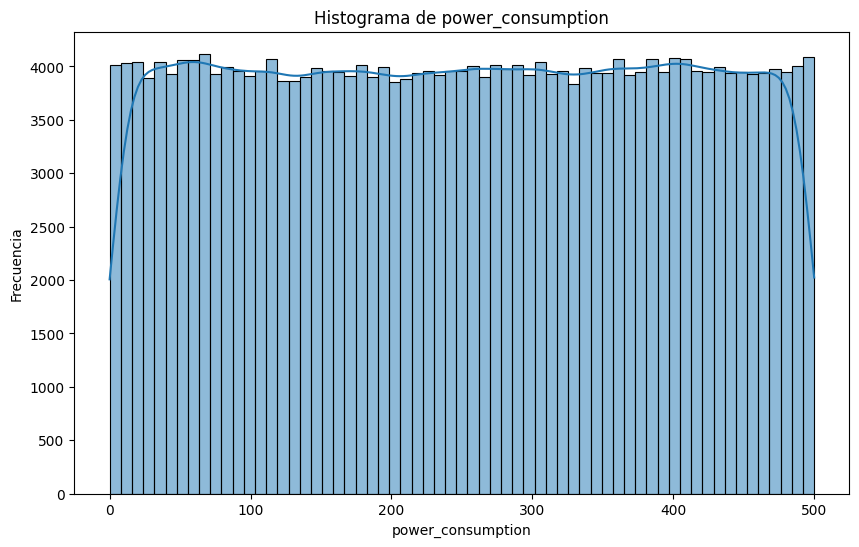

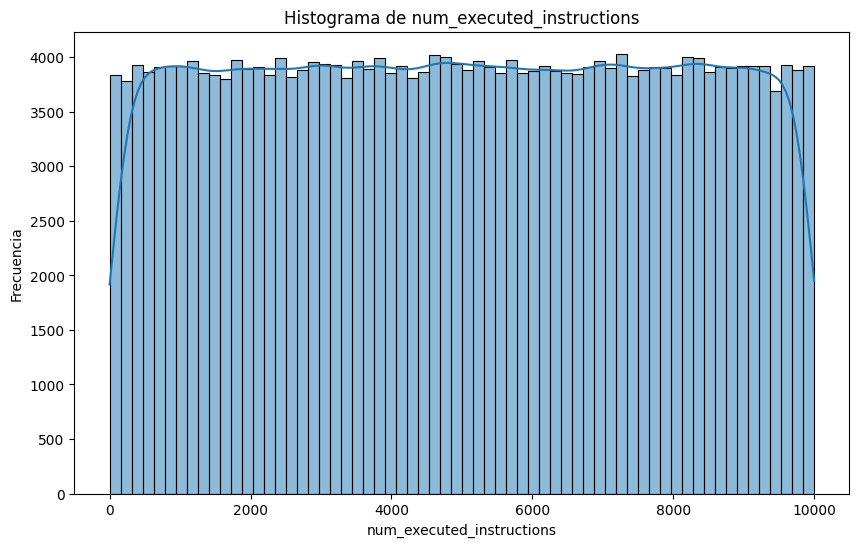

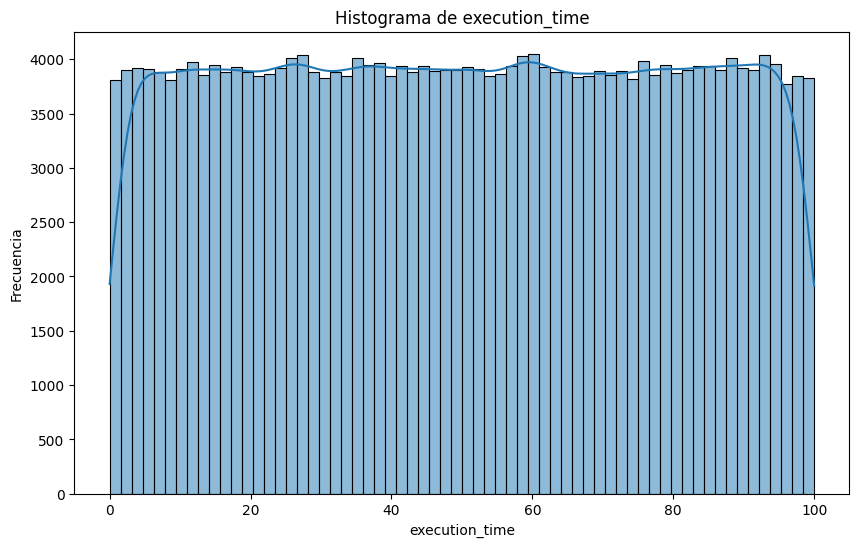

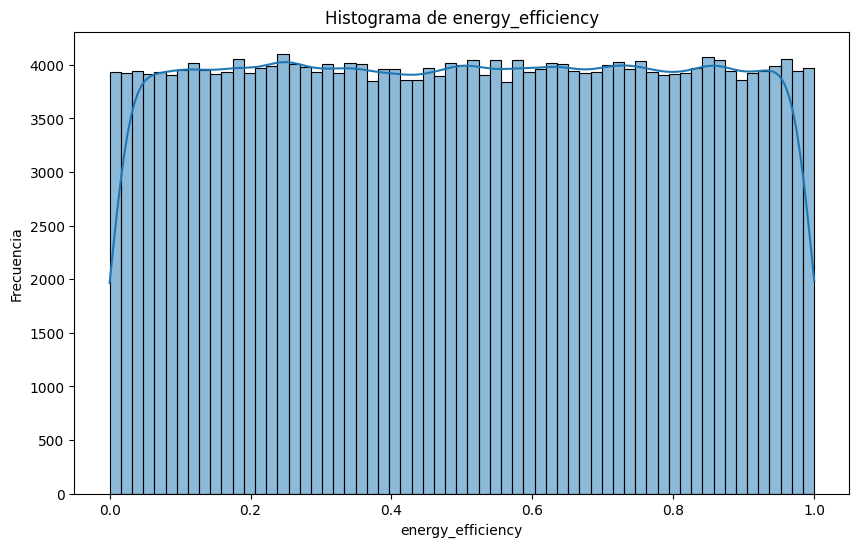

In [9]:


# Generar histogramas
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()




Basado en los diagramas generados, podemos observar que todos siguen una distribución uniforme. Esto significa que todos los valores dentro del rando de la variable tienen aproximadamente la misma probabilidad de ocurrir. Lo que implica analisar las variables desde otro punto de vista

#### Diagramas de cajas y bigotes

In [ ]:

# Generar diagramas de caja
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var])
    plt.title(f'Diagrama de Caja de {var}')
    plt.xlabel(var)
    plt.show()

Podemos observar que no hay puntos fuera de los bigotes, que los bigotes lleguen a los extremas es concecuencia de la distribución uniforme

Aunque la distribuición total parezca uniforme, es muy probable que las distribuciones para los datos normales y anómalos sean diferentes entre sí.

Por tanto deberiamos visualizar por Categoría de Anomalía

### Visualizar por Categoría de Anomalía
Generar los gráficos, pero esta vez, separando los datos por el valor de la columna **Anomaly status**. Esto nos permitirá comparar la distribucón de los casos normales vs los casos anómalos

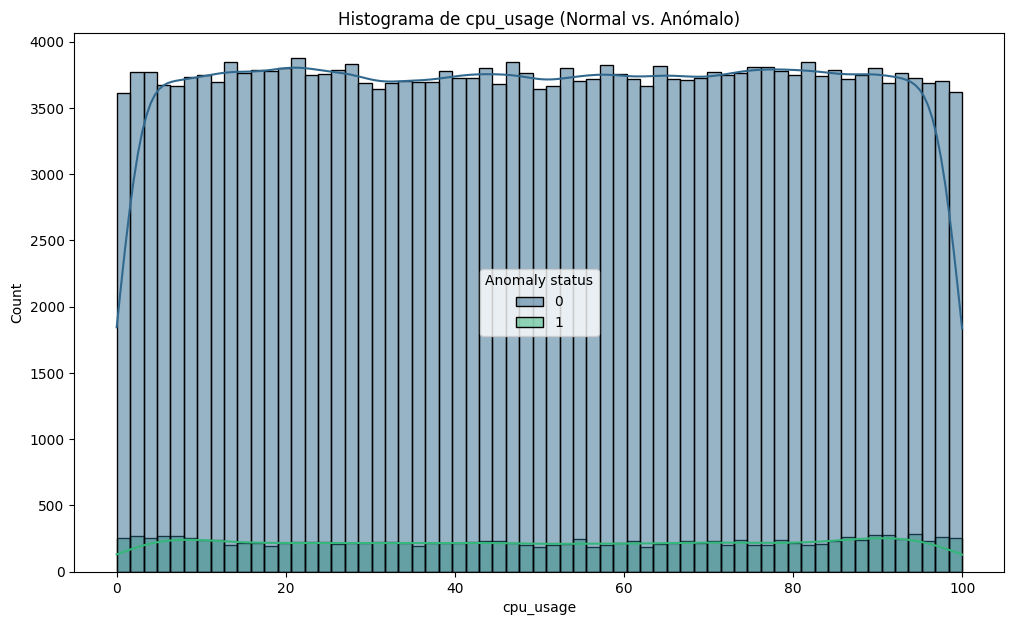

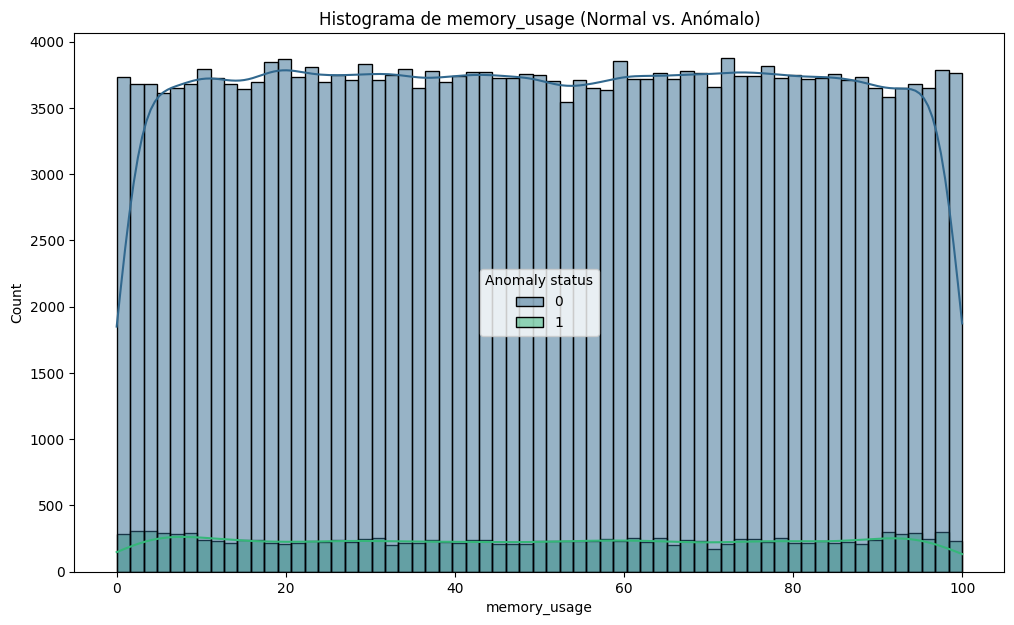

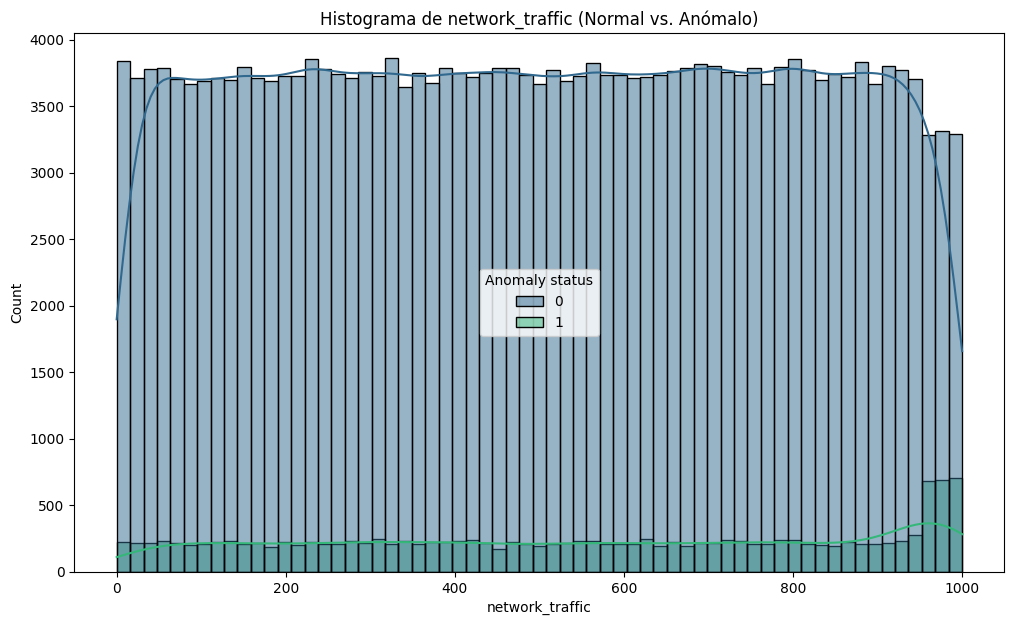

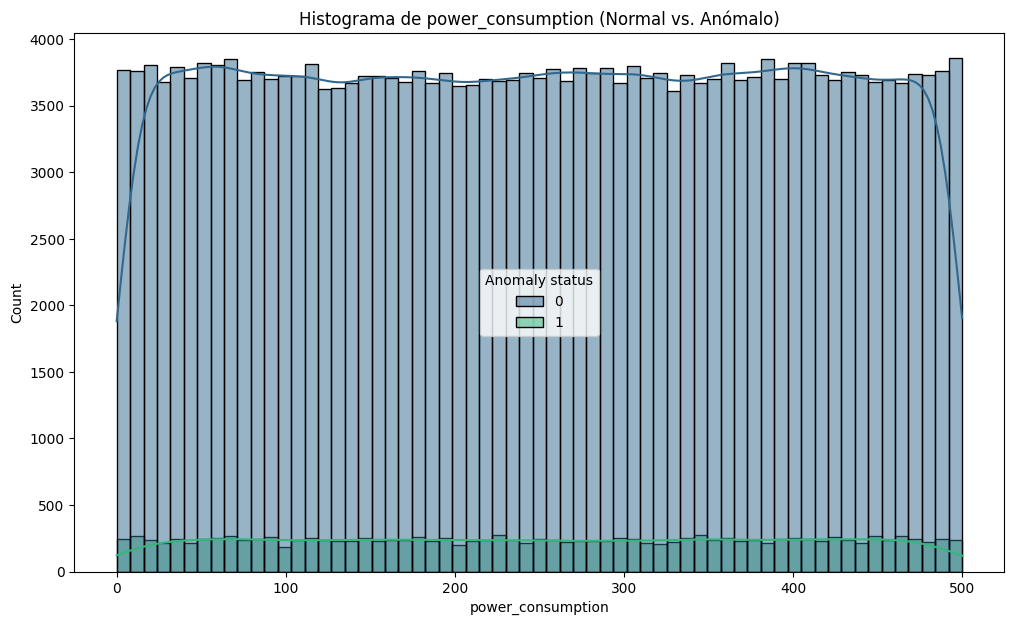

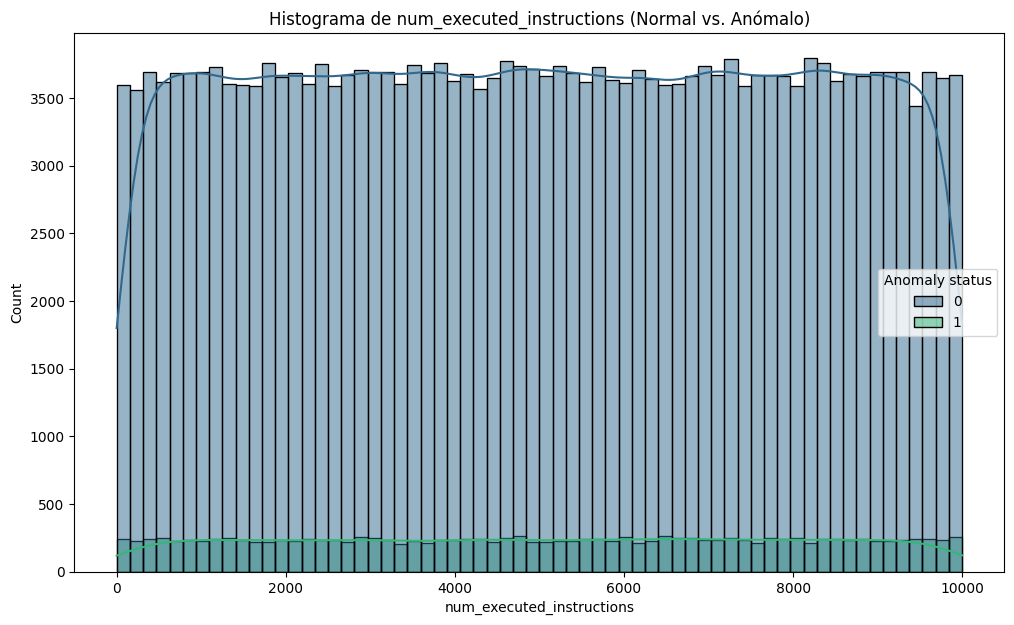

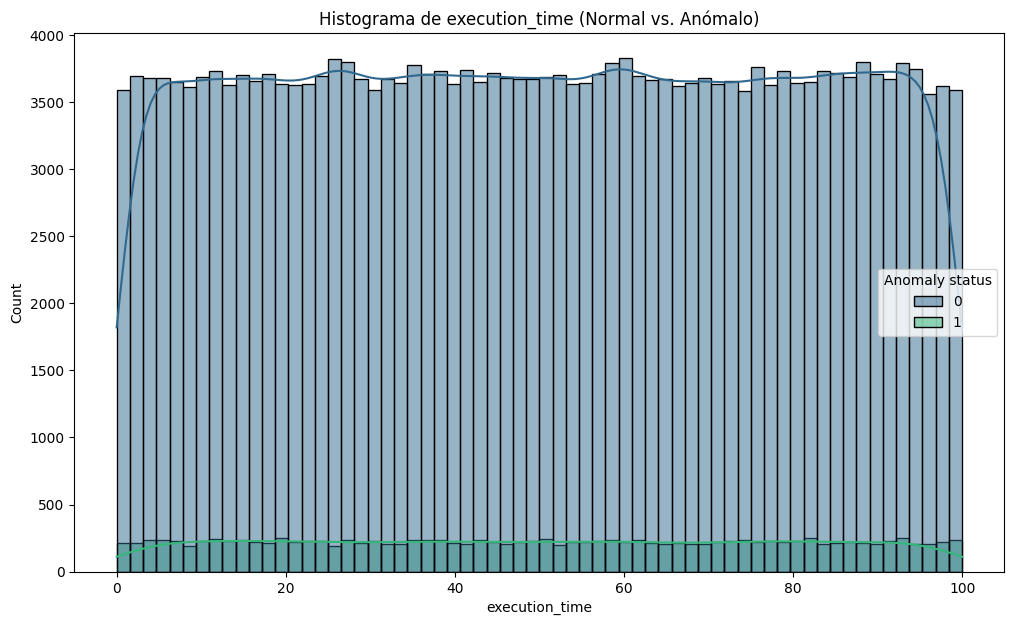

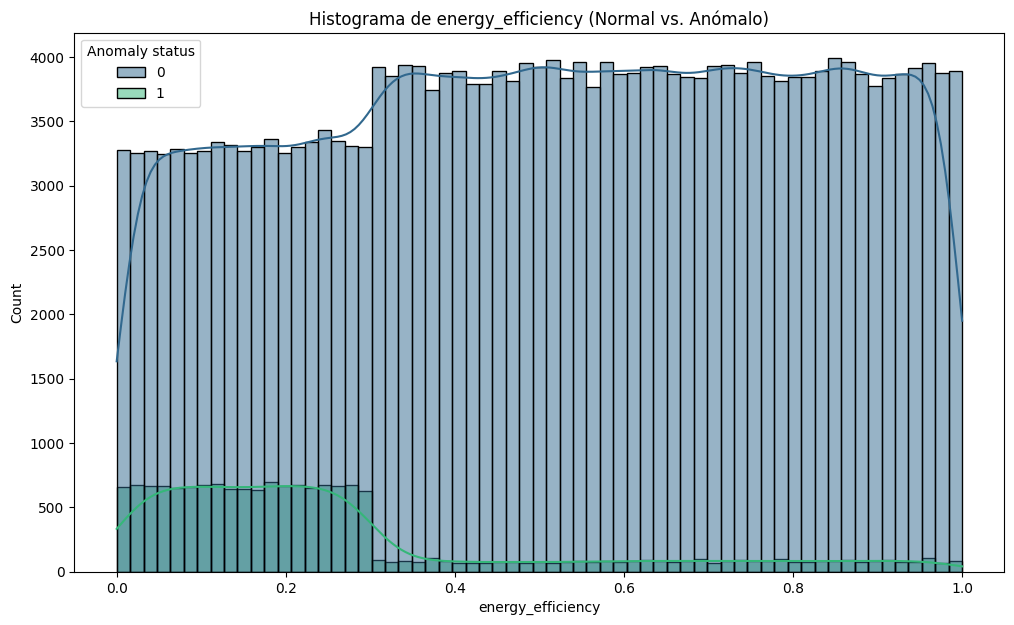

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


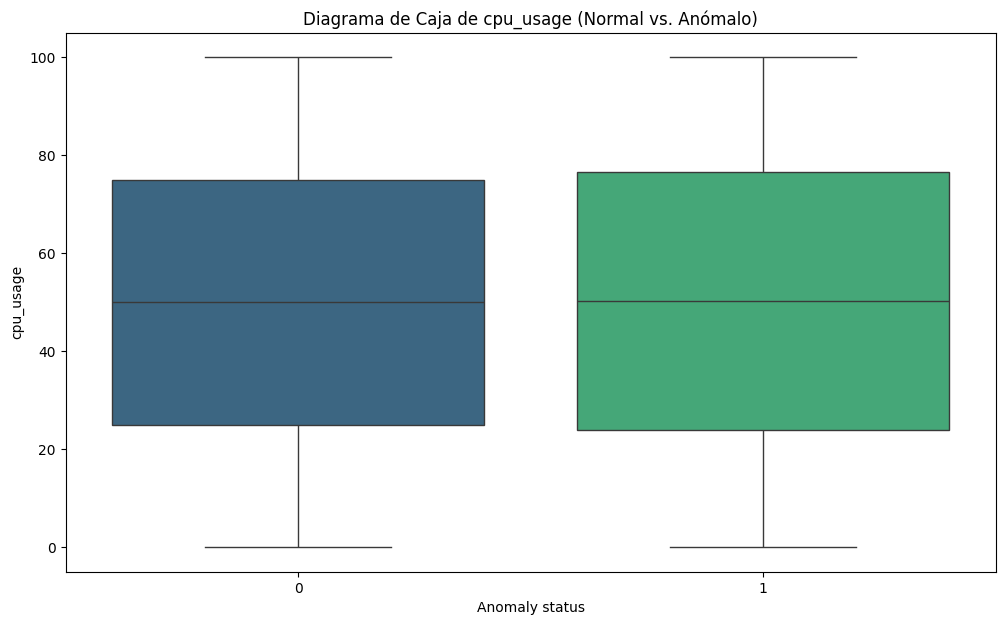

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


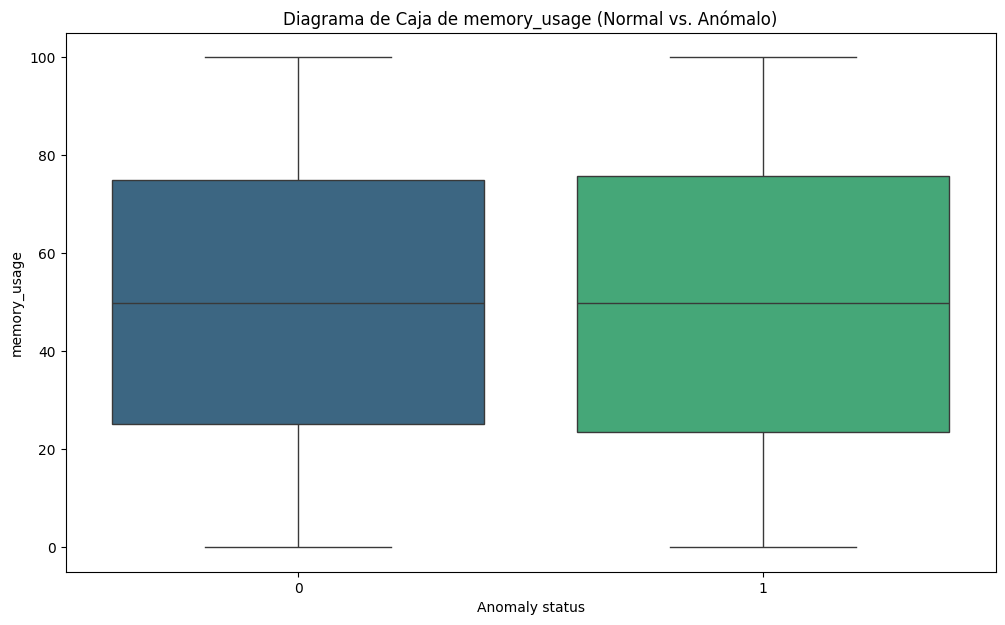

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


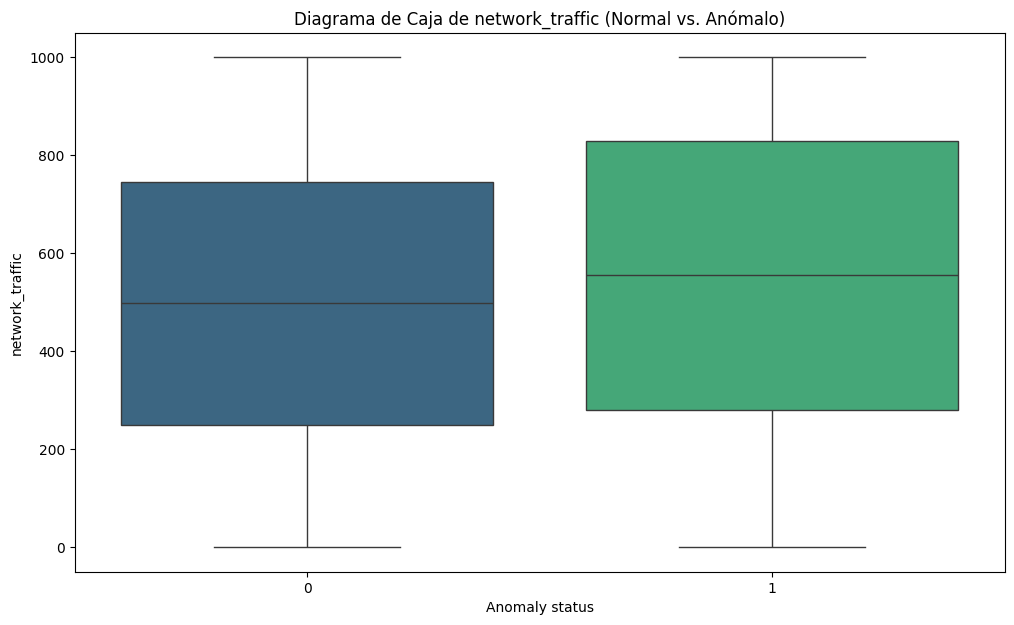

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


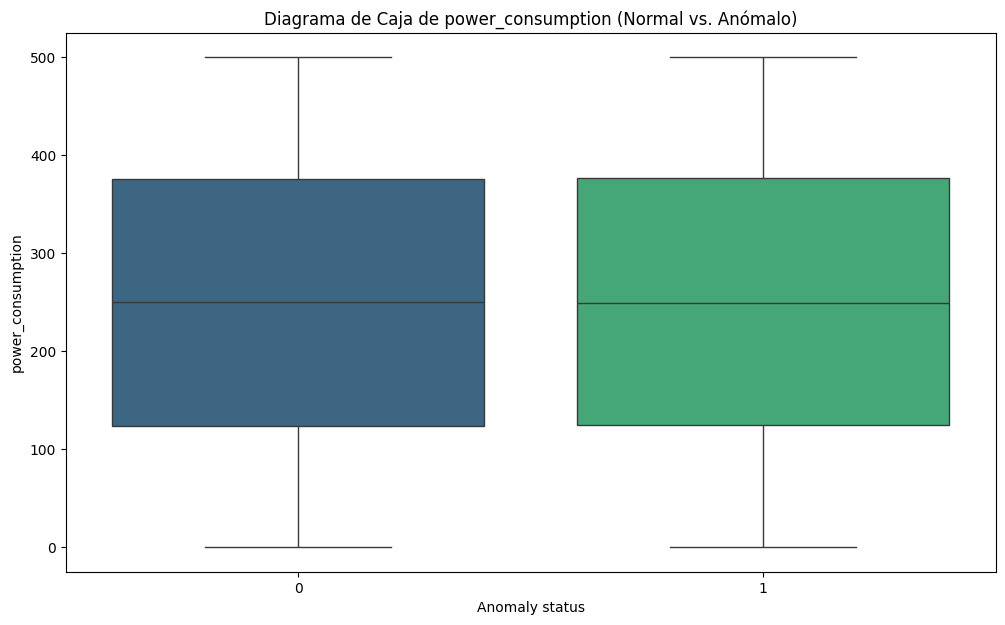

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


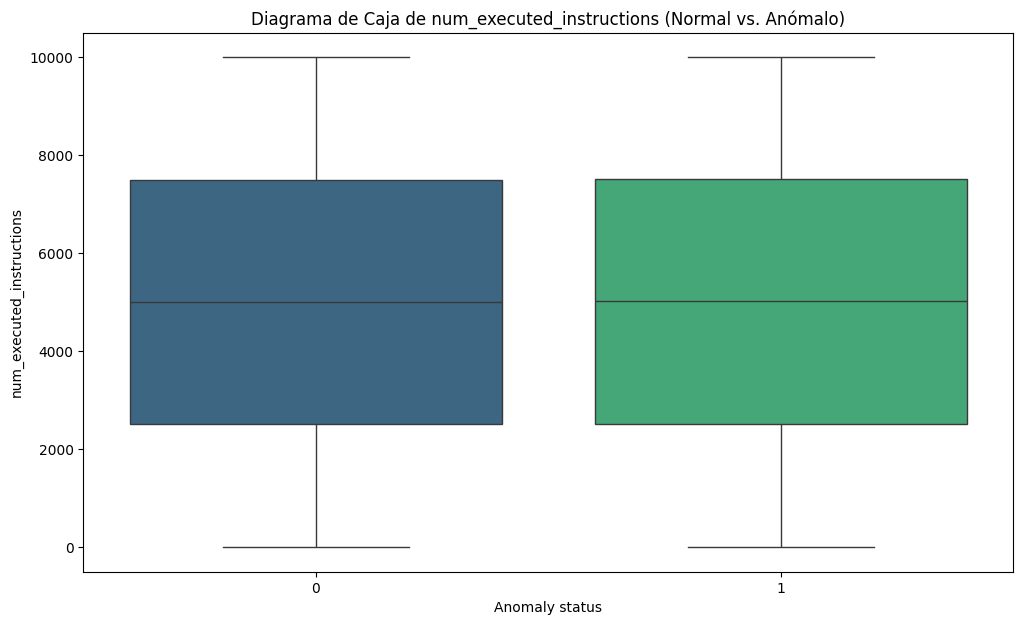

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


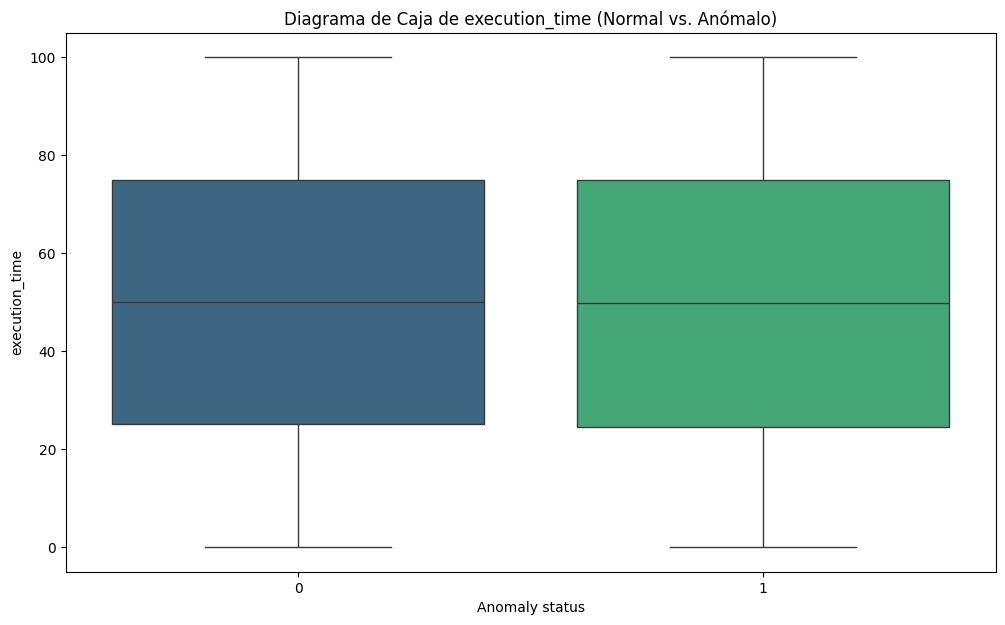

/tmp/ipykernel_9027/2348728022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')


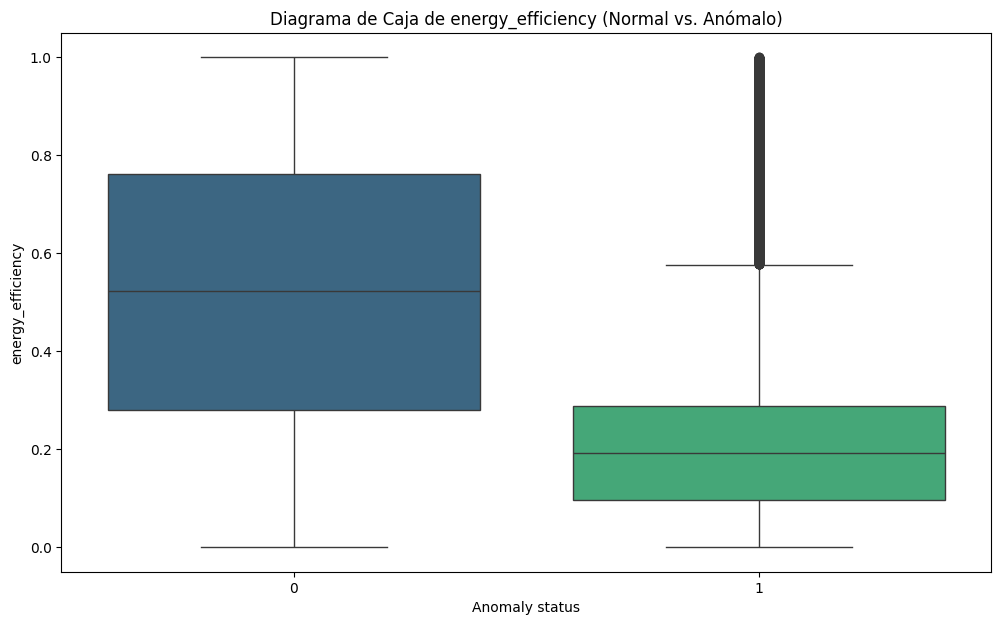

In [10]:
# Generar histogramas separados por anomalía
for var in numerical_vars:
    plt.figure(figsize=(12, 7))
    # Usamos displot que maneja 'hue' de forma muy efectiva
    sns.histplot(data=df, x=var, hue='Anomaly status', kde=True, palette='viridis')
    plt.title(f'Histograma de {var} (Normal vs. Anómalo)')
    plt.show()

# Generar diagramas de caja separados por anomalía
for var in numerical_vars:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='Anomaly status', y=var, palette='viridis')
    plt.title(f'Diagrama de Caja de {var} (Normal vs. Anómalo)')
    plt.show()

#### Análisis de Distribuciones por Estado de Anomalía

Al visualizar las distribuciones de las variables numéricas segmentadas por la variable objetivo (Anomaly status), se
revelan patrones cruciales para la construcción del modelo:

* Desbalance de Clases Significativo: Se confirma una característica común en problemas de detección de anomalías: un
    fuerte desbalance de clases. El conjunto de datos contiene una proporción considerablemente mayor de instancias
    normales (0) en comparación con las anómalas (1). Este factor es crítico y deberá ser gestionado antes de la fase de
    entrenamiento mediante balanceo

* Patrón en `network_traffic`: Esta variable demuestra ser un fuerte indicador de anomalías. Se observa una alta
    concentración de instancias anómalas en el rango de valores altos (aproximadamente 950-1000). Por el contrario, las
    instancias normales son muy infrecuentes en este mismo rango, lo que sugiere que un tráfico de red excepcionalmente
    alto es un síntoma claro de un comportamiento anómalo.

* Patrón en `energy_efficiency`: De manera similar, la eficiencia energética es un predictor clave. Los valores bajos de
    energy_efficiency (en el intervalo de 0.0 a 0.3) están fuertemente correlacionados con la ocurrencia de anomalías. Las
    instancias normales, en cambio, tienden a presentar una eficiencia energética más alta y muestran una frecuencia muy
    baja en este rango.

#### Conclusión del Análisis Visual:

El análisis exploratorio revela que, aunque las distribuciones generales de las variables pueden parecer uniformes,
existen diferencias claras y medibles en las distribuciones cuando se separan por clase (normal vs. anómela). Variables
como network_traffic y energy_efficiency son especialmente prometedoras y probablemente tendrán un alto poder predictivo
en los modelos de machine learning que se desarrollarán

### Visualizacón de Variables Categóricas
Para entender si las difenretes categorías se relacionan con el estado de anomalía

Para las variables categóricas como `task_type`, `task_priority` y `task_status`, los diagramas de barras son la herramienta ideal. Nos permitiran ver la frecuancia absoluta o relativa de cada categoría

Al igual que el analisis previo, es fundamental analizar estas distrivuciones separados por el `anomaly_status` para identificar si ciertas categorías están más asociadas con el comportamietno anómalo

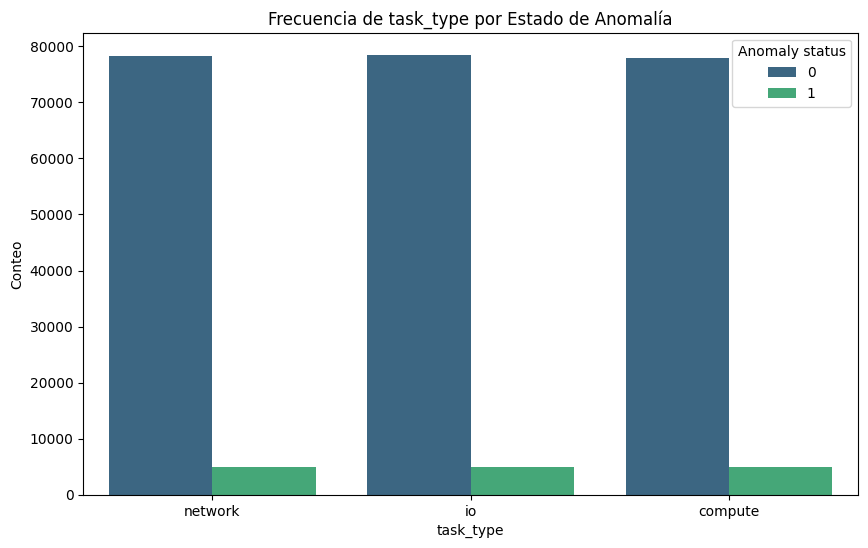

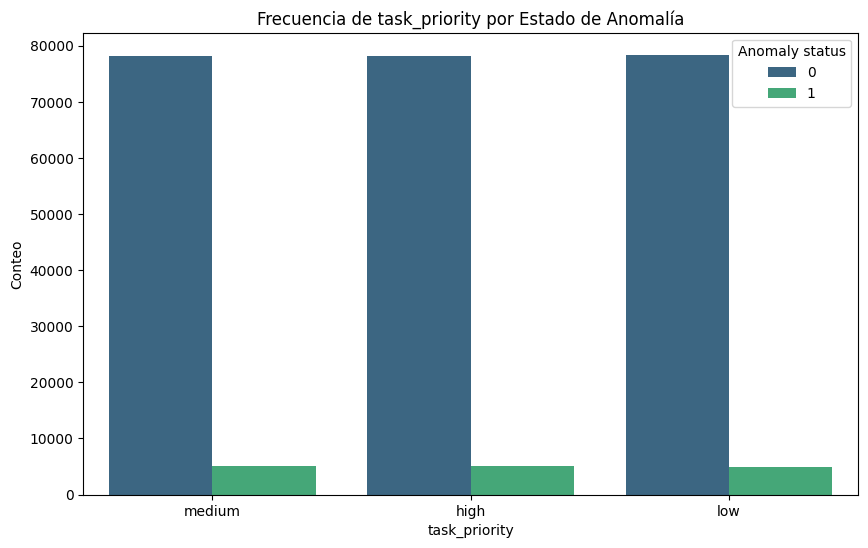

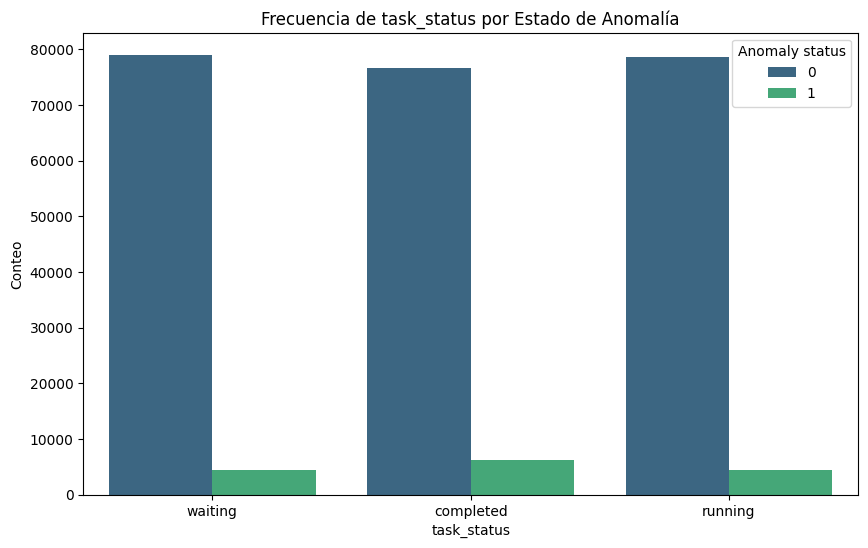

In [11]:
# Seleccionar las variables categóricas a visualizar
categorical_vars = ['task_type', 'task_priority', 'task_status']

# Generar diagramas de barras para cada variable categórica, separados por Anomaly status
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue='Anomaly status', palette='viridis')
    plt.title(f'Frecuencia de {var} por Estado de Anomalía')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.show()

- Análisis de `task_status`:
    - En el caso de las anomalías, se observa una frecuencia ligeramente superior de instancias en el estado completed en
       comparación con los estados running y waiting, los cuales presentan frecuencias muy similares entre sí.
    - Para las instancias normales, la categoría completed exhibe una frecuencia marginalmente inferior a las otras dos
      categorías (running y waiting).
    - Implicación: Este patrón sugiere que, aunque el estado completed podría parecer benigno, una proporción
      relativamente mayor de anomalías se manifiesta en este estado. Esto indica que el task_status podría ser un factor
      discriminatorio, aunque sutil, para la detección de anomalías, y su interacción con otras variables podría ser
      relevante.

- Análisis de `task_type` y `task_priority`: Para estas variables, la distribución de frecuencias de sus categorías es
    similar tanto para las instancias normales como para las anómalas, manteniendo la proporción general de desbalance de
    clases observada en el dataset. Esto sugiere que, de forma aislada, task_type y task_priority no presentan un poder
    discriminatorio directo significativo para identificar anomalías. Sin embargo, podrían ser relevantes en combinación
    con otras características o para contextualizar los eventos.



### Analisis de correlación
El análisis de correlación es un paso crucial para entender las relaciones entre las variables numéricas, y es fundamental para la selección de características

#### Analisis de correlación con Mapa de Calor

Una Matriz de correlación nos mmostrarás el coeficiente de correlación (Pearson) entre cada par de variables númericas. Un mapa de calor es una excelente manera de visualizar esta matriz

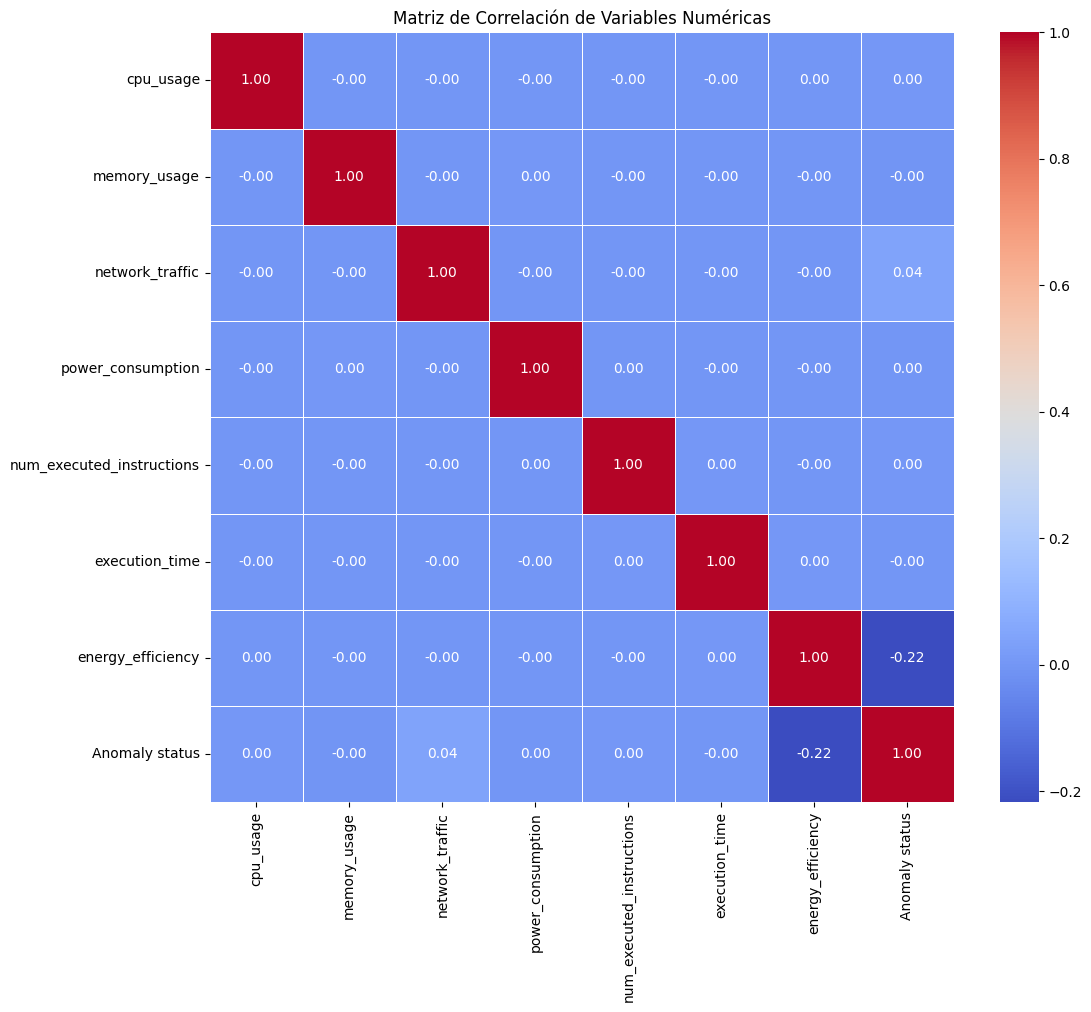

In [14]:
numerical_vars_for_corr = [
    'cpu_usage',
    'memory_usage',
    'network_traffic',
    'power_consumption',
    'num_executed_instructions',
    'execution_time',
    'energy_efficiency',
    'Anomaly status' # Incluimos la variable objetivo
]

# Calcular la matriz de correlación
correlation_matrix = df[numerical_vars_for_corr].corr()

# Generar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#### Análisis de Correlación

El análisis del mapa de calor revela los siguientes puntos clave:

- Principal Predictor Lineal (`energy_efficiency`): La variable energy_efficiency muestra la correlación más
    significativa con Anomaly status, con un coeficiente de -0.22. Esta correlación negativa moderada indica que una menor
    eficiencia energética está linealmente asociada con una mayor probabilidad de anomalía. Este resultado cuantitativo
    refuerza los hallazgos del análisis visual, donde se observó una alta frecuencia de anomalías en los rangos bajos de
    esta variable.

- Correlación Débil pero Relevante (`network_traffic`): La variable network_traffic presenta una correlación positiva
    débil de 0.04 con la variable objetivo. Aunque el valor es bajo, es el segundo más relevante y sugiere que un aumento
    en el tráfico de red tiene una ligera asociación lineal con la ocurrencia de anomalías, lo cual también es consistente
    con el análisis visual previo.

- Baja Correlación de Otras Variables: Las demás variables numéricas (cpu_usage, memory_usage, power_consumption, etc.)
    exhiben coeficientes de correlación muy cercanos a cero con Anomaly status. Esto implica que no poseen una relación
    lineal fuerte con la variable objetivo de forma individual.

- Ausencia de Multicolinealidad: Se observa una correlación extremadamente baja entre las variables predictoras. La
    ausencia de multicolinealidad es beneficiosa, ya que indica que las características son en gran medida independientes y
    no aportan información redundante, lo que simplifica la interpretación del modelo.

#### Conclusión del Análisis de Correlación:

El análisis de correlación posiciona a energy_efficiency y, en menor medida, a network_traffic como las características
numéricas con mayor poder predictivo lineal. Estos hallazgos serán fundamentales para la etapa de selección de
características y la construcción del modelo.


# II. Diseño de Experimentos y Recolección de Resultados

## 3. Estrategia de Preparación de Datos.

## 4. Experimentación y Ajuste de Parámetros

## 5. Descripción de los experimentos de ajuste de paramentros

## 5. Analisis de Resultados Finales

# III. Comparación de Modelos entrenados y conclusiones


## 6. Comparacion del mejor modelo obtenido por cada método

## 7. Conclusiones del trabajo